In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense


import os
import cv2
from PIL import Image
import numpy as np

In [ ]:
image_directory = '/content/drive/MyDrive/'
SIZE = 150
dataset = []
label = []

In [ ]:
real_logos = os.listdir(image_directory+'emblem_logo_images/')
for i, image_name in enumerate(real_logos):

    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory+'emblem_logo_images/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

fake_logos = os.listdir(image_directory + 'fake_emblem_logo/')
for i, image_name in enumerate(fake_logos):
    if (image_name.split('.')[1] == 'jpg'):
        image = cv2.imread(image_directory + 'fake_emblem_logo/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

dataset = np.array(dataset)
label = np.array(label)
print("Dataset size is ", dataset.shape)
print("Label size is ", label.shape)

Dataset size is  (65, 150, 150, 3)
Label size is  (65,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, label, test_size = 0.20, random_state = 0)
print("Train size is ", X_train.shape)
print("Test size is ", X_test.shape)

from keras.utils import normalize
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

Train size is  (52, 150, 150, 3)
Test size is  (13, 150, 150, 3)


In [ ]:
###Define the model

INPUT_SHAPE = (SIZE, SIZE, 3)   #change to (SIZE, SIZE, 3)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=INPUT_SHAPE))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer = 'he_uniform'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',             #also try adam
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
history = model.fit(X_train,
                         y_train,
                         batch_size = 64,
                         verbose = 1,
                         epochs = 300,
                         validation_data=(X_test,y_test),
                         shuffle = False
                     )


model.save('malaria_model_100epochs.h5')

Epoch 1/300
1/1 [==============================] - 8s 8s/step - loss: 0.7106 - accuracy: 0.2885 - val_loss: 0.4356 - val_accuracy: 0.8462
Epoch 2/300
1/1 [==============================] - 0s 100ms/step - loss: 0.5550 - accuracy: 0.7500 - val_loss: 0.6148 - val_accuracy: 0.8462
Epoch 3/300
1/1 [==============================] - 0s 84ms/step - loss: 0.6334 - accuracy: 0.7308 - val_loss: 0.4116 - val_accuracy: 0.8462
Epoch 4/300
1/1 [==============================] - 0s 94ms/step - loss: 0.6255 - accuracy: 0.7500 - val_loss: 0.5773 - val_accuracy: 0.8462
Epoch 5/300
1/1 [==============================] - 0s 82ms/step - loss: 0.6059 - accuracy: 0.7500 - val_loss: 0.4343 - val_accuracy: 0.8462
Epoch 6/300
1/1 [==============================] - 0s 64ms/step - loss: 0.5614 - accuracy: 0.7500 - val_loss: 0.4681 - val_accuracy: 0.8462
Epoch 7/300
1/1 [==============================] - 0s 66ms/step - loss: 0.5276 - accuracy: 0.7500 - val_loss: 0.3654 - val_accuracy: 0.8462
Epoch 8/300
1/1 [====

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


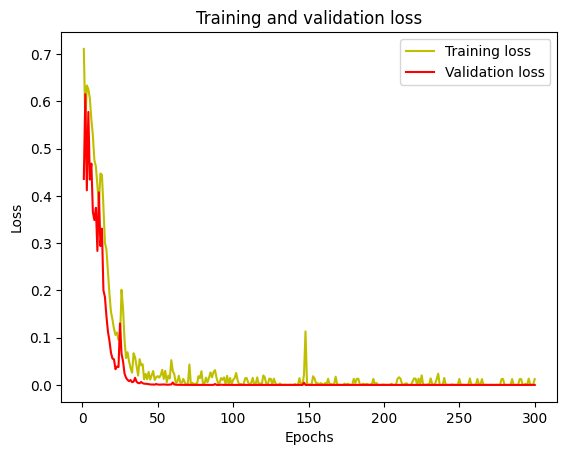

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

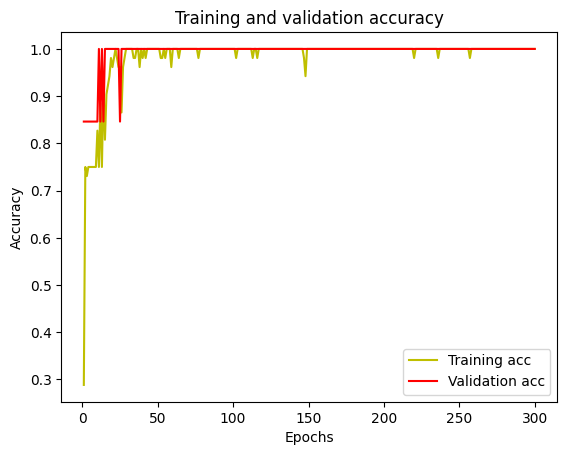

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 22ms/step
The prediction for this image is:  1
The actual label for this image is:  1


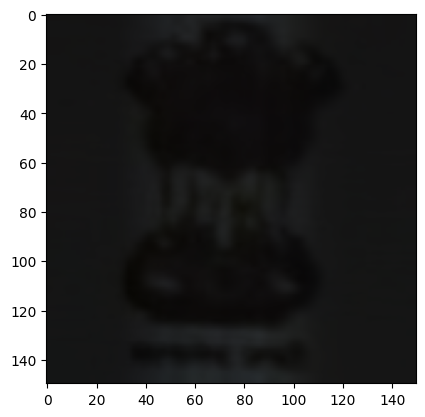

In [ ]:
n=1  #Select the index of image to be loaded for testing
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
print("The prediction for this image is: ", int(model.predict(input_img)[0][0]))
print("The actual label for this image is: ", y_test[n])

In [ ]:
#We can load the trained model, so we don't have to train again for 300 epochs!
from keras.models import load_model
# load model
model = load_model('malaria_model_100epochs.h5')

#For 300 epochs, giving 82.5% accuracy

_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


mythreshold=0.885
from sklearn.metrics import confusion_matrix

y_pred = (model.predict(X_test)>= mythreshold).astype(int)
cm=confusion_matrix(y_test, y_pred)
print(cm)

1/1 [==============================] - 0s 145ms/step - loss: 2.7322e-09 - accuracy: 1.0000
Accuracy =  100.0 %
1/1 [==============================] - 0s 76ms/step
[[ 2  0]
 [ 0 11]]


1/1 [==============================] - 0s 31ms/step


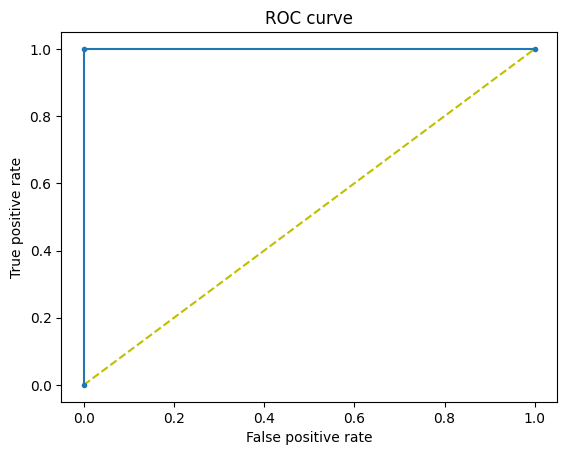

In [ ]:
#ROC
from sklearn.metrics import roc_curve
y_preds = model.predict(X_test).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'y--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

In [ ]:
import pandas as pd
i = np.arange(len(tpr))
roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'thresholds' : pd.Series(thresholds, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal threshold is: ", ideal_roc_thresh['thresholds'])


from sklearn.metrics import auc
auc_value = auc(fpr, tpr)
print("Area under curve, AUC = ", auc_value)




Ideal threshold is:  1    1.0
Name: thresholds, dtype: float32
Area under curve, AUC =  1.0
